<a href="https://colab.research.google.com/github/OctavaOrigin/Classic-Machine-Learning/blob/main/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B2%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D0%BE%D0%B2_%D0%B8_%D0%B3%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%BE%D0%B2%D1%8B%D1%85_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('glass.csv')

In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
X = data.loc[:, ~data.columns.isin(['Type'])]
y = data['Type']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8604651162790697

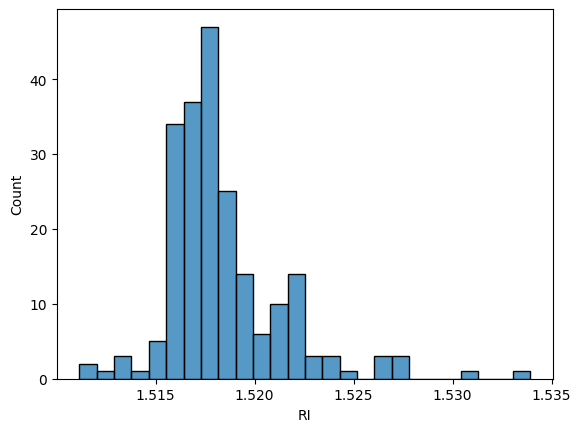

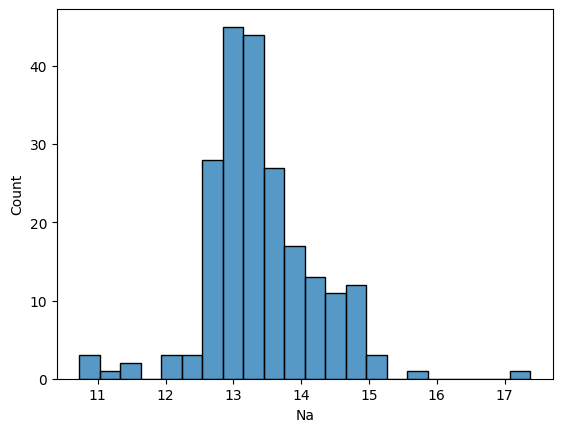

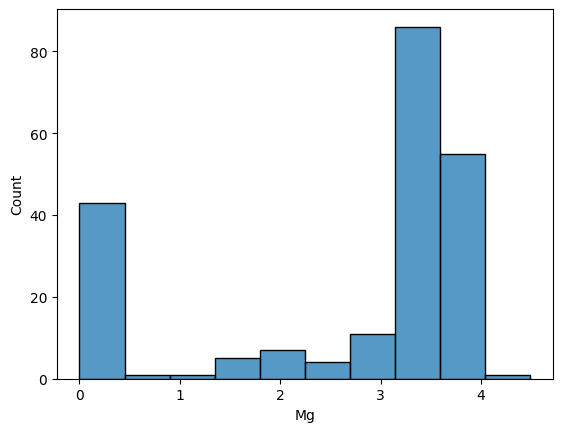

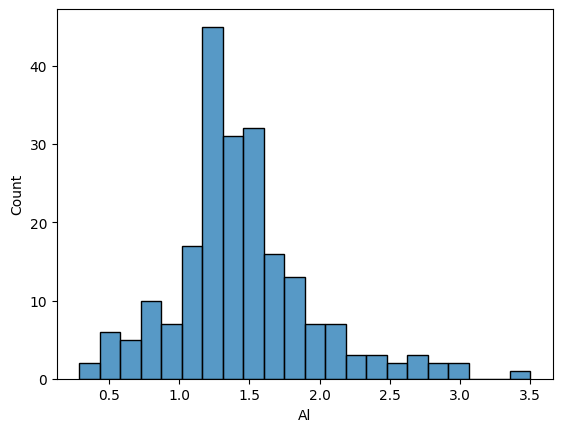

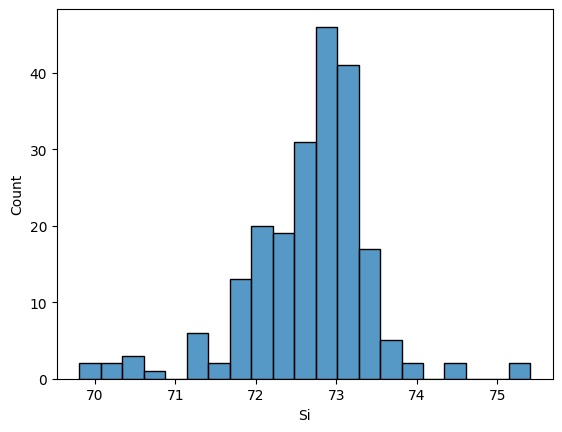

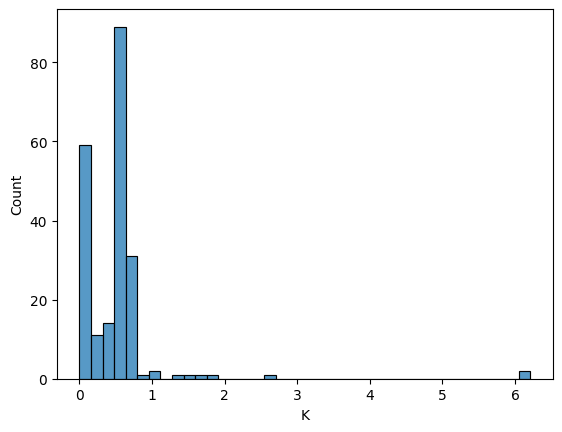

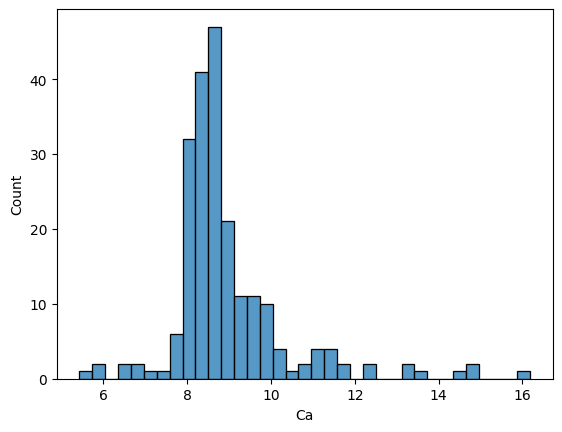

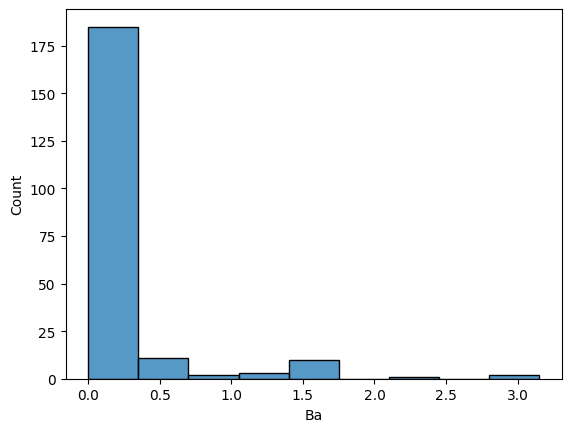

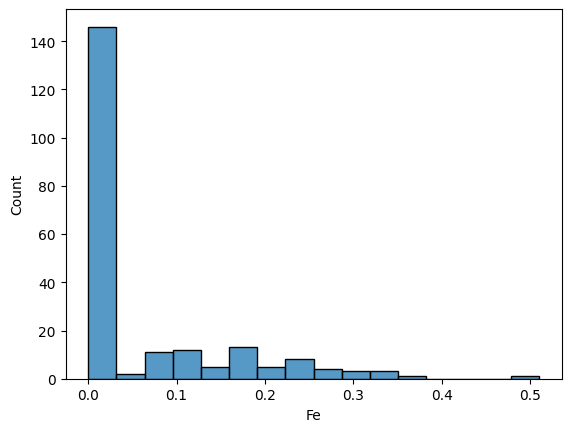

In [ ]:
for col in X.columns:
  sns.histplot(X[col])
  plt.show()

Есть парочка похожих на норм распределение вариантов. Проще просто использовать Шапиро-Уилка

In [ ]:
from scipy.stats import shapiro

In [ ]:
for col in X.columns:
  stat, p = shapiro(X[col])
  if (p > 0.05):
    print(f'Norm {col}')

Ни одного

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model = IsolationForest(contamination = 0.05)
model.fit(X)
data['IF_predict'] = model.predict(X)
data.loc[data['IF_predict'] == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,IF_predict
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2,-1
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,-1
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2,-1
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,-1
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,-1
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,-1
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,-1
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7,-1
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7,-1
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,7,-1


Выбросы изоляционного дерева, поищем ещё

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

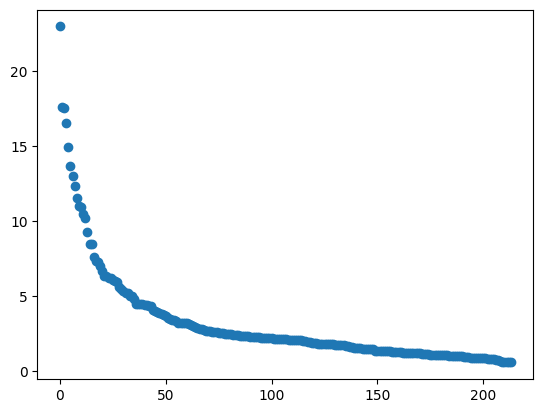

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

model = NearestNeighbors(n_neighbors = 4)
model.fit(X_norm)

dist, _ =  model.kneighbors(X_norm)
dist_sum = np.sum(dist, axis=1)
plt.scatter(np.arange(len(dist_sum[np.argsort(dist_sum)[::-1]])), dist_sum[np.argsort(dist_sum)[::-1]])

Так.. Пускай всё что больше 10 будет выбросом

In [ ]:
data['knn_predict'] = np.where(dist_sum > 10, -1, 1)

In [ ]:
data.loc[data['knn_predict'] == -1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,IF_predict,knn_predict
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2,-1,-1
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,-1,-1
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2,-1,-1
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,-1,-1
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,-1,-1
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,-1,-1
174,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5,1,-1
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,-1,-1
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7,1,-1
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7,-1,-1


Knn выбросы. Добавим ещё один столбец

In [ ]:
def outliers(X, col):
  iqr = X[col].quantile(0.75) - X[col].quantile(0.25)
  lower = X[col].quantile(0.25) - 1.5*iqr
  upper = X[col].quantile(0.75) + 1.5*iqr
  X.loc[(X[col] < lower) | (X[col] > upper), ['sd_predict']] = -1
  return X

data['sd_predict'] = 1
for col in X.columns:
  data = outliers(data, col)

In [ ]:
data.loc[data['sd_predict'] == -1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,IF_predict,knn_predict,sd_predict
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1,1,1,-1
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,1,1,-1
32,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1,1,1,-1
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1,1,1,-1
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,1,-1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7,1,1,-1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7,1,1,-1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7,1,1,-1


Выбросы по стандартному отклонению. Их немного больше.

Осталось объединить результаты, выкинуть лишнее и научить модель ещё раз

In [ ]:
X = data.loc[(data['sd_predict'] == 1) | (data['knn_predict'] == 1) | (data['IF_predict'] == 1),~data.columns.isin(['IF_predict', 'knn_predict', 'sd_predict'])]
y = X['Type']
del X['Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8292682926829268

Стало только хуже...